# Worksheet:3 - 4 _ 19bcs6072

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import math

In [3]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

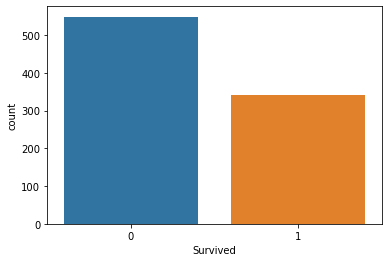

In [6]:
sns.countplot(x='Survived',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

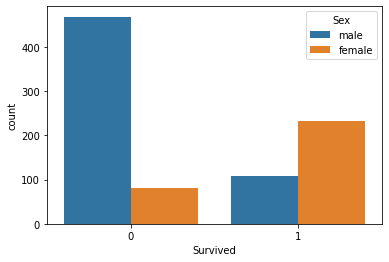

In [4]:
sns.countplot(x='Survived',data=data,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

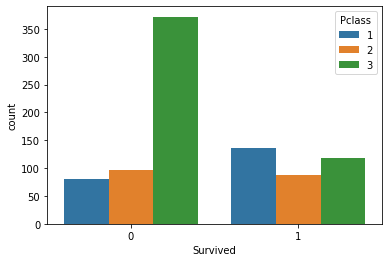

In [5]:
sns.countplot(x='Survived',data=data,hue='Pclass')

<AxesSubplot:ylabel='Frequency'>

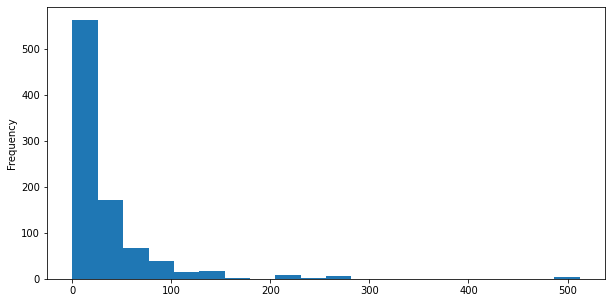

In [6]:
data['Fare'].plot.hist(bins=20,figsize=(10,5))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Wrangling

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

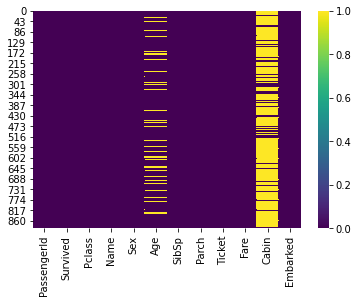

In [9]:
sns.heatmap(data.isnull(),cmap='viridis')

In [10]:
data.drop('Cabin',axis=1,inplace=True)
data.Age.fillna(data.Age.mean(),inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
data.dropna(inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
data.shape

(889, 11)

In [13]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [14]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [15]:
pcl=pd.get_dummies(data['Pclass'],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [16]:
data=pd.concat([data,sex,embark,pcl],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [17]:
data.drop(['PassengerId','Name','Ticket','Embarked','Sex','Pclass'],axis=1,inplace=True)
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [18]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']
x.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [19]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [20]:
x.ndim,y.ndim

(2, 1)

### Training the model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [22]:
model.score(x_train,y_train)

0.8087201125175809

In [23]:
model.score(x_test,y_test)*100

81.46067415730337

In [24]:
model.coef_

array([[-4.20744781e-02, -3.15314399e-01, -8.87192528e-02,
         2.46738604e-03, -2.66873395e+00,  2.24300804e-01,
        -2.13280425e-01, -8.89750340e-01, -2.21394949e+00]])

In [25]:
model.intercept_

array([3.95800086])

In [26]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[99, 11],
       [22, 46]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8146067415730337

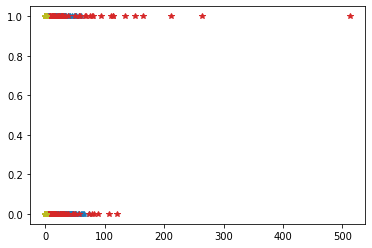

In [29]:
plt.plot(x_test,y_pred,'*')